# GMSL Analysis and Prediction 

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

In [3]:
df.head().append(df.tail())

,Date,Extent,WaterTemp,O2ml,SiO3,NO3,LandAverageTemperature,LandAndOceanAverageTemperature,CO2,IsGMSLIncreased,GMSL
0,1969-01,11.412998,13.265000,5.595000,7.00000,3.250,1.966,13.518,324.00,0,-35.8
1,1969-02,11.419180,12.435000,5.695000,6.40000,5.200,2.450,13.747,324.42,0,-37.2
2,1969-03,11.425310,15.535000,5.490000,4.00000,0.300,5.131,14.576,325.64,1,-36.2
3,1969-04,11.431388,12.070000,5.312500,8.50000,6.400,8.576,15.518,326.66,0,-37.4
4,1969-05,11.437415,12.120000,5.945000,6.00000,3.700,11.354,16.329,327.34,0,-38.6
535,2013-08,12.338645,12.053062,5.263625,7.47125,8.925,14.742,17.462,395.20,1,71.6
536,2013-09,12.298467,12.200875,5.302750,6.75750,8.100,13.154,16.894,393.45,0,68.8
537,2013-10,13.236306,12.348688,5.341875,6.04375,7.275,10.256,15.905,393.70,0,66.4
538,2013-11,13.405600,12.496500,5.381000,5.33000,6.450,7.424,15.107,395.16,0,59.7
539,2013-12,13.066000,13.062250,5.427250,4.62625,4.275,4.724,14.339,396.84,0,58.5


In [4]:
df.describe()

,Extent,WaterTemp,O2ml,SiO3,NO3,LandAverageTemperature,LandAndOceanAverageTemperature,CO2,IsGMSLIncreased,GMSL
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,11.633582,12.703859,5.140705,8.623137,7.488843,9.091504,15.553526,355.062907,0.525926,8.211111
std,1.257900,1.178649,0.613406,5.566774,4.980329,4.156488,1.233037,34.925471,0.499790,31.076247
min,8.441054,9.187500,2.320000,1.900000,0.000000,1.882000,13.298000,-99.990000,0.000000,-42.600000
25%,10.981980,11.967042,5.050313,5.451974,3.850000,4.959750,14.386250,338.025000,0.000000,-15.725000
50%,11.750654,12.453371,5.307197,7.508352,6.741667,9.342500,15.581000,355.390000,1.000000,1.900000
75%,12.585463,13.278750,5.483333,10.000000,9.917708,13.153250,16.729750,373.890000,1.000000,29.925000
max,14.050833,18.627500,6.150000,41.400000,22.900000,15.482000,17.609000,399.780000,1.000000,82.400000


#### Podela skupa podataka na training i test

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            540 non-null    object 
 1   Extent                          540 non-null    float64
 2   WaterTemp                       540 non-null    float64
 3   O2ml                            540 non-null    float64
 4   SiO3                            540 non-null    float64
 5   NO3                             540 non-null    float64
 6   LandAverageTemperature          540 non-null    float64
 7   LandAndOceanAverageTemperature  540 non-null    float64
 8   CO2                             540 non-null    float64
 9   IsGMSLIncreased                 540 non-null    int64  
 10  GMSL                            540 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 46.5+ KB


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(["IsGMSLIncreased", "Date", "GMSL"], axis=1)
Y = df["IsGMSLIncreased"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=35)

In [7]:
X_test = ((X_test-X_train.min())/(X_train.max()-X_train.min())).to_numpy()

#### Normalizaciju vrednosti atributa

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# sc = StandardScaler()
sc = preprocessing.MinMaxScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

## Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

#### Obučavanje - Naive Bayes

In [10]:
nb.fit(X_train, Y_train)

GaussianNB()

#### Predikcija - Naive Bayes

In [11]:
nb_predictions = nb.predict(X_test)
print("Naive Bayes predictions: ", nb_predictions)

Naive Bayes predictions:  [1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1]


#### Score - Naive Bayes

In [12]:
print("Naive Bayes score: ", nb.score(X_test, Y_test))

Naive Bayes score:  0.5481481481481482


In [13]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(Y_test, nb_predictions)
print("Accuracy score: ", ac)

Accuracy score:  0.5481481481481482


#### F1 Score - Naive Bayes

In [14]:
from sklearn.metrics import f1_score

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.44036697 0.62111801]


#### Report - Naive Bayes

In [15]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        58
           1       0.60      0.65      0.62        77

    accuracy                           0.55       135
   macro avg       0.53      0.53      0.53       135
weighted avg       0.54      0.55      0.54       135



## SVM klasifikator

In [16]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')

#### Obučavanje - SVM

In [17]:
clf_svm.fit(X_train, Y_train)

SVC()

#### Predikcija - SVM

In [18]:
svm_predictions = clf_svm.predict(X_test)
print("SVM predictions: ", svm_predictions)

SVM predictions:  [1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0]


#### F1 Score - SVM

In [19]:
from sklearn.metrics import f1_score

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.44036697 0.62111801]


#### Report - SVM

In [20]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        58
           1       0.60      0.65      0.62        77

    accuracy                           0.55       135
   macro avg       0.53      0.53      0.53       135
weighted avg       0.54      0.55      0.54       135



# XGBoost

In [57]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

#### Ponovno učitavanje dataseta zbog kreiranja dtrain i dtest

In [58]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

X = df.drop(["IsGMSLIncreased", "Date", "GMSL"], axis=1)
Y = df["IsGMSLIncreased"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=35)

In [59]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [60]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# "Learn" the mean from the training data
mean_train = np.mean(Y_train)

# Get predictions on the test set
baseline_predictions = np.ones(Y_test.shape) * mean_train

# Compute MAE
mae_baseline = mean_absolute_error(Y_test, baseline_predictions)

print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.50


#### Definisanje parametara modela bez optimizacije

In [61]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
}

In [62]:
params['eval_metric'] = "mae"
num_boost_round = 999

#### Obučavanje modela

In [63]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:0.49222
[1]	Test-mae:0.49626
[2]	Test-mae:0.49402
[3]	Test-mae:0.49046
[4]	Test-mae:0.49527
[5]	Test-mae:0.49539
[6]	Test-mae:0.49466
[7]	Test-mae:0.49518
[8]	Test-mae:0.49225
[9]	Test-mae:0.48917
[10]	Test-mae:0.49029
[11]	Test-mae:0.49340
[12]	Test-mae:0.49268
[13]	Test-mae:0.48876
[14]	Test-mae:0.48782
[15]	Test-mae:0.48335
[16]	Test-mae:0.48335
[17]	Test-mae:0.48537
[18]	Test-mae:0.48505
[19]	Test-mae:0.48657
[20]	Test-mae:0.48806
[21]	Test-mae:0.48716
[22]	Test-mae:0.48962
[23]	Test-mae:0.49153
[24]	Test-mae:0.49270
[25]	Test-mae:0.49526


In [64]:
print("Best MAE (Mean Absolute Error): {:.2f} with {} rounds".format(model.best_score, model.best_iteration + 1))

Best MAE (Mean Absolute Error): 0.48 with 17 rounds


#### Report - XGBoost bez optimizacije parametara

In [65]:
xgb_pred = model.predict(dtest)
xgb_predictions = [round(value) for value in xgb_pred]

In [66]:
f1_sc = f1_score(Y_test, xgb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.46511628 0.5106383 ]


In [67]:
print(classification_report(Y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.42      0.52      0.47        58
           1       0.56      0.47      0.51        77

    accuracy                           0.49       135
   macro avg       0.49      0.49      0.49       135
weighted avg       0.50      0.49      0.49       135



#### Unakrsna validacija pomoću XGBoost.

In [68]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

In [69]:
cv_results.head()

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.465505,0.007034,0.499450,0.010603
1,0.439316,0.010747,0.503178,0.013240
2,0.413999,0.014849,0.504611,0.015097
3,0.396364,0.011921,0.500085,0.017702
4,0.372683,0.015913,0.498060,0.019201


In [70]:
cv_results['test-mae-mean'].min()
print("MIN MAE: {}".format(cv_results['test-mae-mean'].min()))

MIN MAE: 0.49805979999999994


### Optimizacija parametara XGB

In [199]:
# params = {
#     'max_depth':[3, 4, 6, 8, 11, 13],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'min_child_weight': [1, 2, 3, 4],
#     'eta':[0.1, 0.2, 0.3],
#     'subsample': np.arange(1.0, 2.0, 4.0),
#     'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#     'n_estimators' : [100, 200, 300]
#     # Other parameters
#    # 'objective':'binary:logistic',
# }

params = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
          'max_depth': [3, 5,6,7,8,9,10,11,12,13,14],
          'n_estimators': [50,65,80,100,115,130,150],
          'min_child_weight': [1, 2, 3, 4],
          'eta':[0.1, 0.2, 0.3],
         'subsample': np.arange(1.0, 2.0, 4.0),
     'colsample_bytree': np.arange(0.4, 1.0, 0.1),
         }

xgbr = xgb.XGBRegressor(seed = 20)

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=5,
                         verbose=1)
clf.fit(X_train, Y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': 0.1, 'eta': 0.1, 'colsample_bytree': 0.6}
Lowest RMSE:  0.5366042356953803


### Najbolji parametri:  
#### 'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.01, 'eta': 0.1, 'colsample_bytree': 0.7

In [235]:
# params = {
#     'max_depth':13,
#     'min_child_weight': 1,
#     'learning_rate': 0.01,
#     'eta':.3,
#     'subsample': 1,
#     'colsample_bytree': 0.5,
#     # Other parameters
#     'objective':'binary:logistic',
# }

# params = {
#     'max_depth':4,
#     'min_child_weight': 8,
#     'learning_rate': 0.01,
#     'eta':.2,
#     'subsample': 1,
#     'colsample_bytree': 0.6,
#     # Other parameters
#     'objective':'binary:logistic',
# }


params = {
    'max_depth':3,
    'min_child_weight': 6,
    'learning_rate': 0.01,
    'eta':.2,
    'subsample': 1,
    'colsample_bytree': 0.8,
    # Other parameters
    'objective':'binary:logistic',
}
#early_stopping_rounds=10
#F1 score:  [0.5210084  0.62251656] 



params['eval_metric'] = "mae"


best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:0.49986
[1]	Test-mae:0.49965
[2]	Test-mae:0.49944
[3]	Test-mae:0.49922
[4]	Test-mae:0.49915
[5]	Test-mae:0.49894
[6]	Test-mae:0.49873
[7]	Test-mae:0.49871
[8]	Test-mae:0.49858
[9]	Test-mae:0.49845
[10]	Test-mae:0.49825
[11]	Test-mae:0.49824
[12]	Test-mae:0.49804
[13]	Test-mae:0.49784
[14]	Test-mae:0.49780
[15]	Test-mae:0.49768
[16]	Test-mae:0.49760
[17]	Test-mae:0.49740
[18]	Test-mae:0.49721
[19]	Test-mae:0.49702
[20]	Test-mae:0.49683
[21]	Test-mae:0.49664
[22]	Test-mae:0.49646
[23]	Test-mae:0.49636
[24]	Test-mae:0.49623
[25]	Test-mae:0.49622
[26]	Test-mae:0.49610
[27]	Test-mae:0.49609
[28]	Test-mae:0.49590
[29]	Test-mae:0.49583
[30]	Test-mae:0.49573
[31]	Test-mae:0.49555
[32]	Test-mae:0.49538
[33]	Test-mae:0.49520
[34]	Test-mae:0.49508
[35]	Test-mae:0.49515
[36]	Test-mae:0.49514
[37]	Test-mae:0.49506
[38]	Test-mae:0.49489
[39]	Test-mae:0.49488
[40]	Test-mae:0.49478
[41]	Test-mae:0.49471
[42]	Test-mae:0.49467
[43]	Test-mae:0.49466
[44]	Test-mae:0.49458
[45]	Test-mae:0.4945

In [240]:
xgb_pred = best_model.predict(dtest)
xgb_predictions = [round(value) for value in xgb_pred]

In [241]:
f1_sc = f1_score(Y_test, xgb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.5210084  0.62251656]


In [242]:
print(classification_report(Y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        58
           1       0.64      0.61      0.62        77

    accuracy                           0.58       135
   macro avg       0.57      0.57      0.57       135
weighted avg       0.58      0.58      0.58       135



In [243]:
print("Best MAE: {:.2f} in {} rounds".format(best_model.best_score, best_model.best_iteration + 1))

Best MAE: 0.49 in 143 rounds


#### Značajnost atributa po XGBoost.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

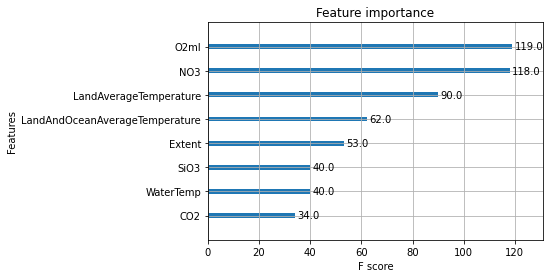

In [244]:
from xgboost import plot_importance

plot_importance(best_model)